In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from scipy import stats
from matplotlib.pyplot import xscale, ylim
import random
import dataframe_image as dfi
import random
import seaborn as sns
from matplotlib.pyplot import figure


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score



In [24]:
pip install tensorflow


In [3]:
#Question 1

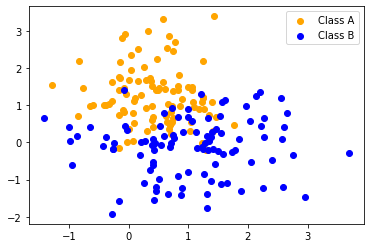

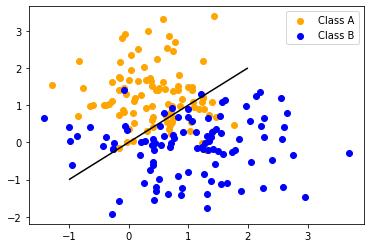

In [4]:
np.random.seed(0)

mu_A = np.array([0, 1])
mu_B = np.array([1, 0])
sigma = np.array([[1/3, 0],[0, 1/3]])

mean_A = np.random.multivariate_normal(mu_A, sigma, 10)
mean_B = np.random.multivariate_normal(mu_B, sigma, 10)

data_A = np.zeros((100, 2))
data_B = np.zeros((100, 2))

for i in range(10):
    data_A[10*i:10*(i+1), :] = np.random.multivariate_normal(mean_A[i, :], sigma, 10)
    data_B[10*i:10*(i+1), :] = np.random.multivariate_normal(mean_B[i, :], sigma, 10)

plt.scatter(data_A[:, 0], data_A[:, 1], c='orange', label='Class A')
plt.scatter(data_B[:, 0], data_B[:, 1], c='blue', label='Class B')
plt.legend()
plt.show()

# bayes
x, y = np.meshgrid(np.linspace(-1, 2, 200), np.linspace(-1, 2, 200))
z = np.zeros(x.shape)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z[i, j] = np.exp(-0.5 * ((x[i, j]-mu_A[0])**2/sigma[0, 0] + (y[i, j]-mu_A[1])**2/sigma[1, 1])) / \
                  np.sqrt(2 * np.pi * sigma[0, 0] * sigma[1, 1]) - \
                  np.exp(-0.5 * ((x[i, j]-mu_B[0])**2/sigma[0, 0] + (y[i, j]-mu_B[1])**2/sigma[1, 1])) / \
                  np.sqrt(2 * np.pi * sigma[0, 0] * sigma[1, 1])

plt.contour(x, y, z, levels=[0], colors='black')
plt.scatter(data_A[:, 0], data_A[:, 1], c='orange', label='Class A')
plt.scatter(data_B[:, 0], data_B[:, 1], c='blue', label='Class B')
plt.legend()
plt.show()


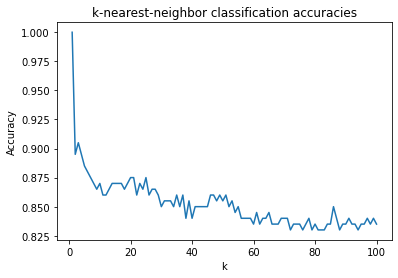

In [9]:

X = np.concatenate((data_A, data_B), axis=0)

y = np.concatenate((np.zeros(100), np.ones(100)))

accuracy = []

for k in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    accuracy.append(knn.score(X, y))

plt.plot(range(1, 101), accuracy)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title('k-nearest-neighbor classification accuracies')
plt.show()


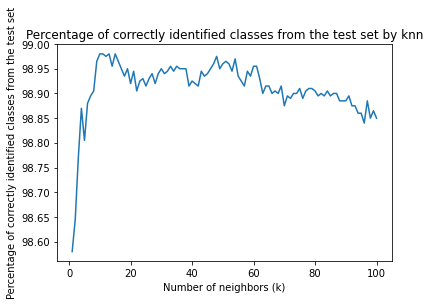

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(0)
mu_A = np.array([0, 1])
mu_B = np.array([1, 0])

mean_A = np.random.randn(10, 2)
mean_B = np.random.randn(10, 2) + 5
sigma = np.eye(2)

data_A = np.zeros((10000, 2))
data_B = np.zeros((10000, 2))
for i in range(10000):
    data_A[i, :] = np.random.multivariate_normal(mean_A[i % 10, :], sigma)
    data_B[i, :] = np.random.multivariate_normal(mean_B[i % 10, :], sigma)
    
X_test = np.concatenate((data_A, data_B), axis=0)

y_test = np.concatenate((np.zeros(10000), np.ones(10000)))

X_train = np.concatenate((data_A[:200, :], data_B[:200, :]), axis=0)
y_train = np.concatenate((np.zeros(200), np.ones(200)))

percent_correct_test = np.zeros(100)

for k in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    percent_correct_test[k-1] = np.sum(y_pred == y_test) / len(y_test) * 100

plt.plot(np.arange(1, 101), percent_correct_test)
plt.xlabel("Number of neighbors (k)")
plt.ylabel("Percentage of correctly identified classes from the test set")
plt.title('Percentage of correctly identified classes from the test set by knn')
plt.show()


In [20]:
#3

In [21]:
mnist_test = pd.read_csv("mnist_test.csv")
mnist_train = pd.read_csv("mnist_train.csv")


11490434/11490434 [==============================] - 1s 0us/step


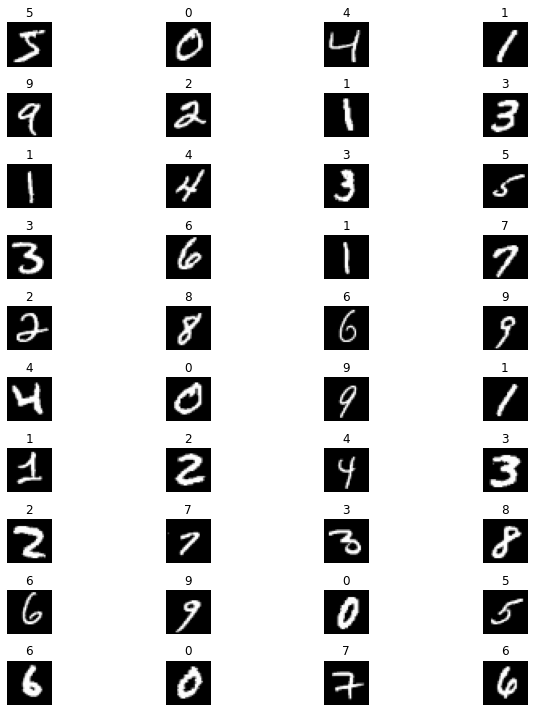

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(10, 10))
for row in range(10):
    for col in range(4):
        axes[row][col].imshow(x_train[row*4 + col], cmap='gray')
        axes[row][col].axis('off')
        axes[row][col].set_title(str(y_train[row*4 + col]))
plt.tight_layout()
plt.show()


In [26]:
#4

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

y_train_onehot = np.zeros((y_train.shape[0], 10))
y_train_onehot[np.arange(y_train.shape[0]), y_train] = 1

reg = LinearRegression(fit_intercept=False).fit(x_train, y_train_onehot)
y_pred_train = reg.predict(x_train).argmax(axis=1)
y_pred_test = reg.predict(x_test).argmax(axis=1)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print("Train confusion matrix:\n", cm_train)
print("Test confusion matrix:\n", cm_test)


Train accuracy: 0.8519166666666667
Test accuracy: 0.8532
Train confusion matrix:
 [[5665    8   19   18   26   43   73    3   62    6]
 [   1 6514   36   16   10   29   15   13  103    5]
 [  93  258 4802  149  101   11  237   84  203   20]
 [  42  142  183 5206   29   92   58  109  139  131]
 [   9   97   56    8 5125   49   48   23   83  344]
 [ 144   70   30  520   82 3786  196   38  404  151]
 [ 107   66   65    1   59   81 5491    0   46    2]
 [  53  187   43   57  153    9    3 5391   18  351]
 [  82  527   58  223  123  234   50   21 4358  175]
 [  65   60   25  113  356    8    4  488   53 4777]]
Test confusion matrix:
 [[ 942    0    2    2    1    7   15    2    7    2]
 [   0 1107    2    2    1    1    5    2   15    0]
 [  17   56  809   28   16    0   42   21   39    4]
 [   4   15   26  886    2   14    9   21   21   12]
 [   0   23    6    3  872    5   10    2   13   48]
 [  20   17    2   84   19  624   22   13   69   22]
 [  17    9   10    0   21   20  872    0    